In [1]:
import numpy as np
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt
%matplotlib inline
                     # NOTE: all "magic" options for backend plotting are: inline, notebook, and "external" (default) 
                     # see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details

# Basic image operations (loading, drawing, cropping)

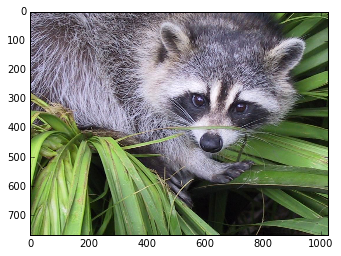

In [2]:
from scipy import misc
im = misc.face()     # a sample image in misc library

#imA=image.imread("../images/IMG_3306.jpg") # another sample image (loaded from your file), uncomment one of the two

plt.figure(1,figsize = (6, 4))
plt.imshow(im)
plt.show()

#### Accessing image and pixel attributes

In [3]:
print "image width,height, and intensity dimensions = ",im.shape
print "color of pixel (100,200) = ", im[100,200]
print "G for pixel(100,200) = ", im[100, 200, 1]

image width,height, and intensity dimensions =  (768L, 1024L, 3L)
color of pixel (100,200) =  [92 81 97]
G for pixel(100,200) =  81


#### Slicing images

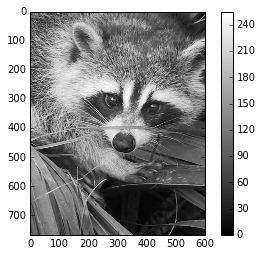

In [4]:
plt.figure(2,figsize = (6, 4))
plt.imshow(im[:,300:900,0],cmap='gray')  # Slice operator : is used to indicate the range of raws, columns, etc.
plt.colorbar()                           # Its typical format is [start:stop] or [start:stop:step] with defaults "None"
plt.show()

# Intensity histograms

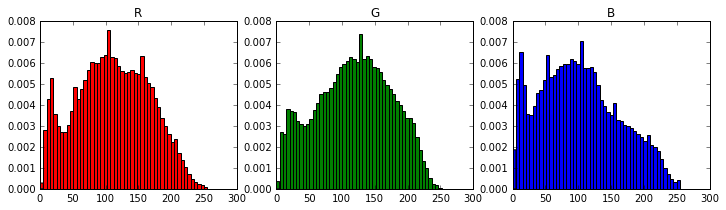

In [5]:
R = np.reshape(im[:,:,0],im.shape[0]*im.shape[1])  # generating a sequence of intensities (R channel)
G = np.reshape(im[:,:,1],im.shape[0]*im.shape[1])  # generating a sequence of intensities (G channel)
B = np.reshape(im[:,:,2],im.shape[0]*im.shape[1])  # generating a sequence of intensities (B channel)

plt.figure(3,figsize = (12, 3))
plt.subplot(131)
plt.hist(R, bins=50, normed=1, facecolor='r')       # matplotlib version (plot)
plt.title("R")
plt.subplot(132)
plt.hist(G, bins=50, normed=1,  facecolor='g')       # matplotlib version (plot)
plt.title("G")
plt.subplot(133)
plt.hist(B, bins=50, normed=1,  facecolor='b')       # matplotlib version (plot)
plt.title("B")
plt.show()

# Built-in filters

In [6]:
from scipy import ndimage

# converting to gray scale (leaving only R channel)
imR = im[:,:,0] 

blurred = ndimage.gaussian_filter(imR, sigma=3)
very_blurred = ndimage.gaussian_filter(imR, sigma=5)

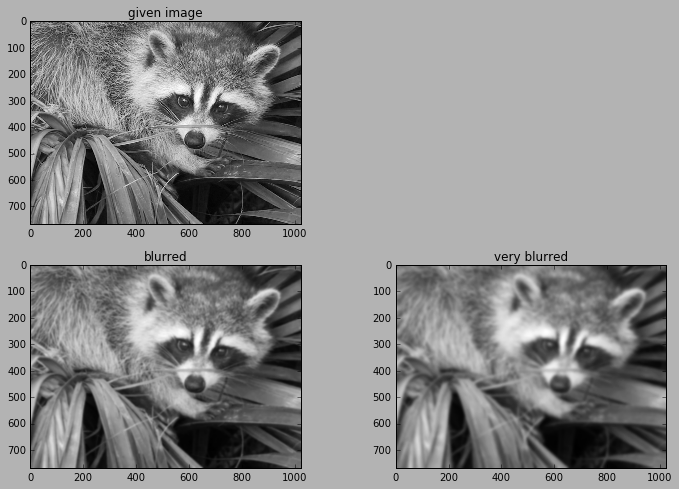

In [7]:
plt.figure(4,figsize = (12, 8),facecolor = '0.7')
plt.subplot(221)
plt.imshow(imR, cmap = 'gray')
plt.title('given image')
plt.subplot(223)
plt.imshow(blurred, cmap = 'gray')
plt.title('blurred')
plt.subplot(224)
plt.imshow(very_blurred, cmap = 'gray')
plt.title('very blurred')
plt.show()

# Generating noise

In [8]:
# generating image with gaussian noise
sigma = 30.0
gauss = np.random.normal(0.0,sigma,(imR.shape[0],imR.shape[1]))  # Gaussian noise array of given shape
gauss_im = blurred + gauss         # additive Gaussian/Normal noise

# generating image with salt-&-pepper noise (only pepper part) 
pool = [0.0,1.0]     # pool of numbers for sampling
prob = [0.2,0.8] # probabilities of these numbers
pepper = np.random.choice(pool,(imR.shape[0],imR.shape[1]), p = prob)  # Bernoulli noise (as array)
pepper_im = blurred * pepper   # value 1 in pepper keeps intensity in "blurred", 0 reduces it to zero

##### visualizing noise data

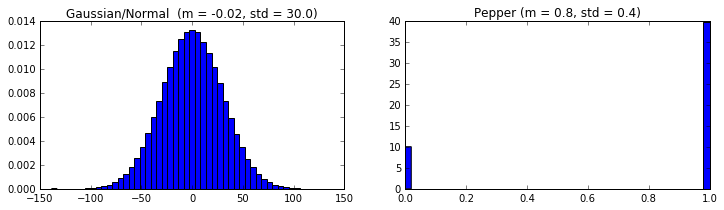

In [9]:
noiseG = np.reshape(gauss,im.shape[0]*im.shape[1]) # generating a sequence from array
noiseP = np.reshape(pepper,im.shape[0]*im.shape[1])           # generating a sequence from array

plt.figure(5,figsize = (12, 3))
plt.subplot(121)
plt.hist(noiseG, bins=50, normed=1)  
plt.title("Gaussian/Normal  (m = %1.2f, std = %2.1f)" % (np.mean(noiseG),np.std(noiseG)))
plt.subplot(122)
plt.hist(noiseP, bins=50, normed=1) 
plt.title("Pepper (m = %1.1f, std = %1.1f)" % (np.mean(noiseP),np.std(noiseP)))
plt.show()

# Image denoising

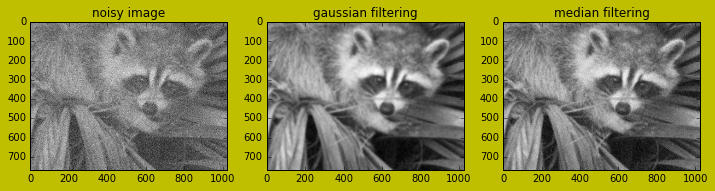

In [10]:
test_im = gauss_im    # choose either gaus_im or pepper_im
denoised_gauss = ndimage.gaussian_filter(test_im, sigma=3)
denoised_med = ndimage.median_filter(test_im, 5)

plt.figure(6,figsize = (12, 3),facecolor = 'y')
plt.subplot(131)
plt.imshow(test_im, cmap = 'gray')
plt.title('noisy image')
plt.subplot(132)
plt.imshow(denoised_gauss, cmap = 'gray')
plt.title('gaussian filtering')
plt.subplot(133)
plt.imshow(denoised_med, cmap = 'gray')
plt.title('median filtering')
plt.show()

# Image sharpenning

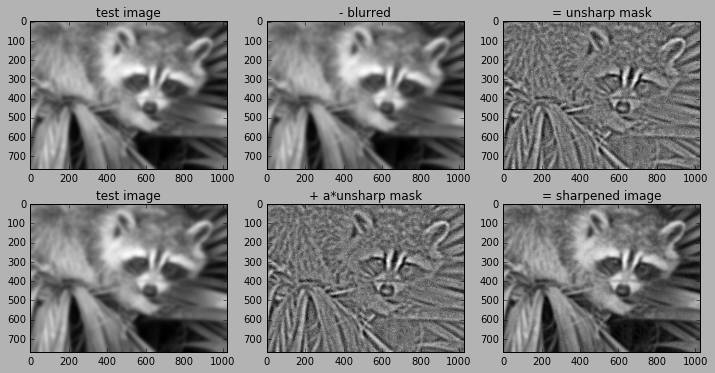

In [11]:
test = ndimage.gaussian_filter(imR, sigma=8)
blurred = ndimage.gaussian_filter(test, sigma=3)

unsharp = test - 1.0*blurred  # 1.0 factor converts to "float"
sharp = test + 10.0*unsharp

plt.figure(7,figsize = (12, 6),facecolor = '0.7')
plt.subplot(231)
plt.imshow(test, cmap = 'gray')
plt.title('test image')
plt.subplot(232)
plt.imshow(blurred, cmap = 'gray')
plt.title('- blurred')
plt.subplot(233)
plt.imshow(unsharp, cmap = 'gray')
plt.title('= unsharp mask')
plt.subplot(234)
plt.imshow(test, cmap = 'gray')
plt.title('test image')
plt.subplot(235)
plt.imshow(unsharp, cmap = 'gray')
plt.title('+ a*unsharp mask')
plt.subplot(236)
plt.imshow(sharp, cmap = 'gray')
plt.title('= sharpened image')
plt.show()

#### Unsharp kernel (a.k.a. DOG or Difference of Gaussians): $(1+\alpha)G_{\sigma_1} - \alpha G_{\sigma_2}$

<IPython.core.display.Javascript object>


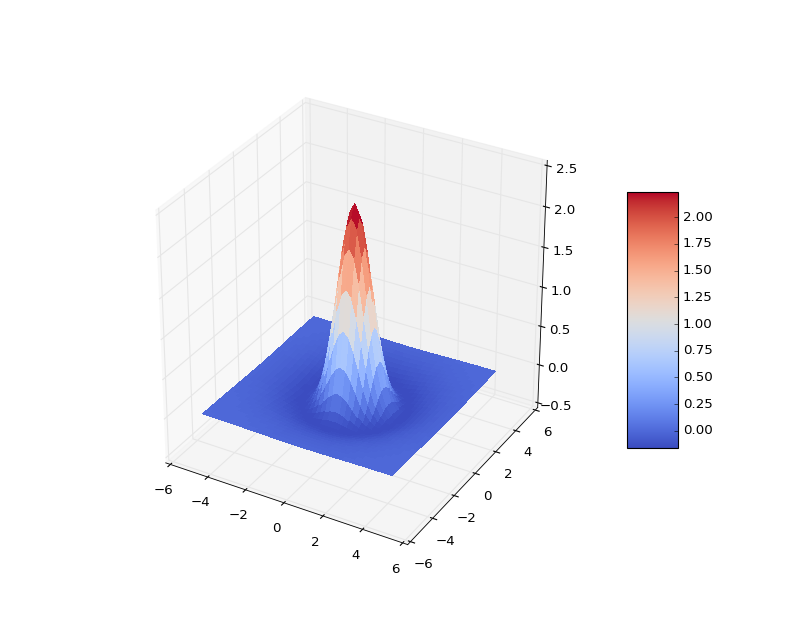

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import math
%matplotlib notebook

X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))

alpha = 10.0
sigma1 = 0.8
sigma2 = 2.0
G1 = (1/(2*math.pi*sigma1*sigma1))*np.exp(-(X**2 + Y**2)/(2*sigma1*sigma1))
G2 = (1/(2*math.pi*sigma2*sigma2))*np.exp(-(X**2 + Y**2)/(2*sigma2*sigma2))
DOG = (1+alpha)*G1 - alpha*G2

fig = plt.figure(8,figsize = (10, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, DOG, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### NOTE: bivariate Gaussian/Normal probability density:  $f(x,y)=\frac{1}{2\pi\sigma^2} \exp\left(-\frac{(x-m_x)^2+(y-m_y)^2}{2\sigma^2}\right)$ 
(this is a simple case assuming independent $x$ and $y$)